In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fmendesdat263xdemos/exercise.csv
/kaggle/input/fmendesdat263xdemos/calories.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
#Data Collection and Merging
df1=pd.read_csv('/kaggle/input/fmendesdat263xdemos/calories.csv')
df2=pd.read_csv('/kaggle/input/fmendesdat263xdemos/exercise.csv')

In [4]:
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
df=pd.concat([df2,df1['Calories']],axis=1)

In [7]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
df.shape

(15000, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
df.isnull().sum()    #Nonull values

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [11]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


## Data Exploration and Analysis


In [12]:
sns.set_theme(style="darkgrid")

In [13]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

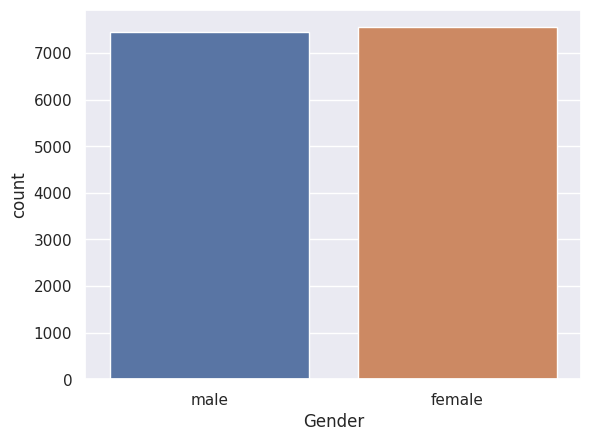

In [14]:
sns.countplot(data=df,x="Gender")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


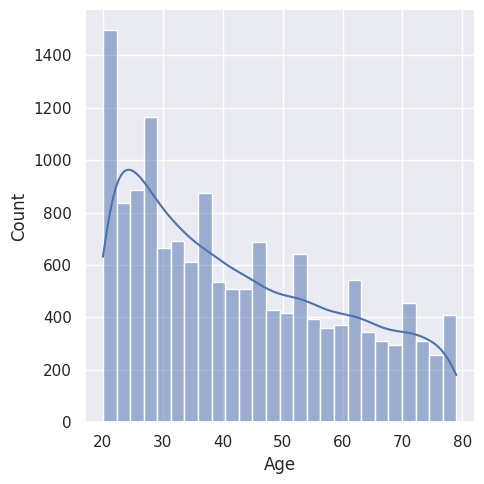

In [15]:
sns.displot(data=df,x="Age",kde=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


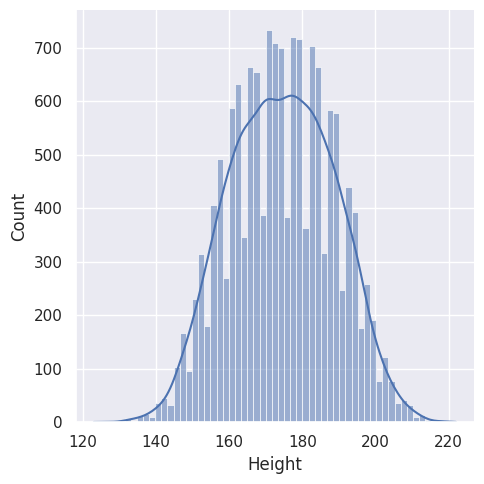

In [16]:
sns.displot(data=df,x="Height",kde=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


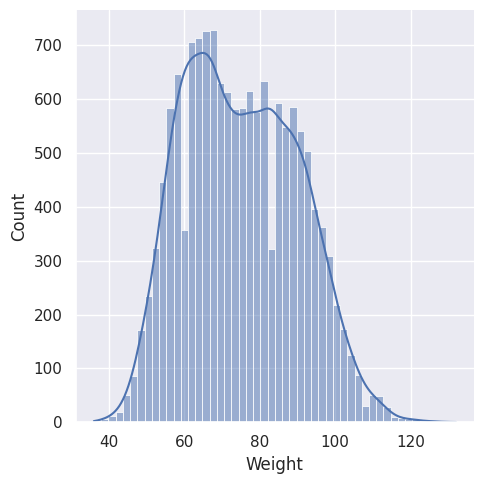

In [17]:
sns.displot(data=df,x="Weight",kde=True)

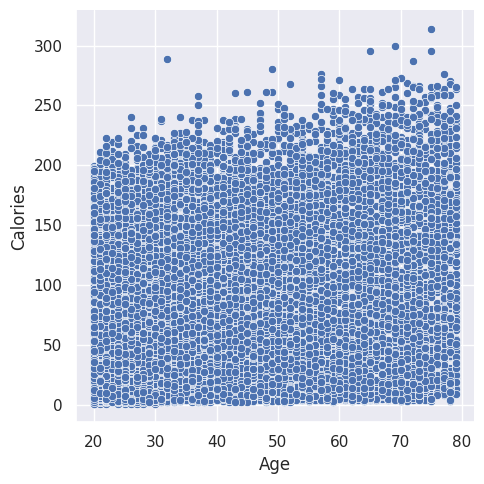

In [18]:
sns.relplot(data=df, x="Age", y="Calories")

In [19]:
#Does Age has any correlation with the number of calories burnt?
print(df['Age'].corr(df['Calories']))   #There is some sort or positive correlation but not that strong

0.1543951313410011


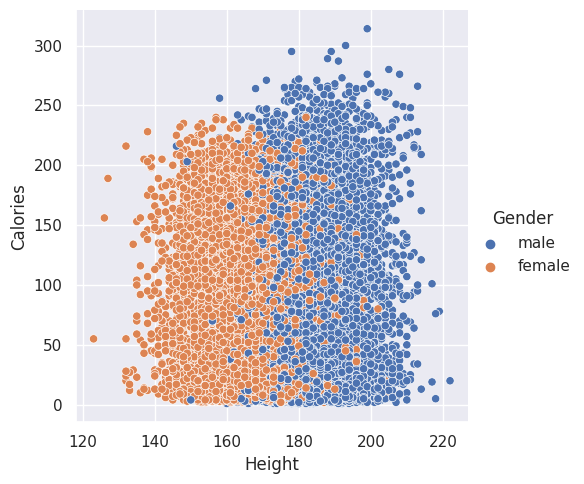

In [20]:
sns.relplot(data=df, x="Height", y="Calories",hue="Gender")

In [21]:
df_male=df[df['Gender']=='male']
print(df_male['Height'].corr(df_male['Calories']))

0.041214930467714135


In [22]:
df_female=df[df['Gender']=='female']
print(df_female['Height'].corr(df_female['Calories']))

-0.040410724226272364


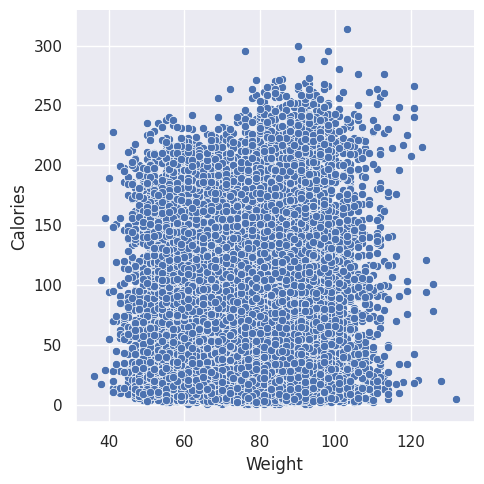

In [23]:
sns.relplot(data=df, x="Weight", y="Calories")

In [24]:
print(df['Weight'].corr(df['Calories']))

0.03548058186832146


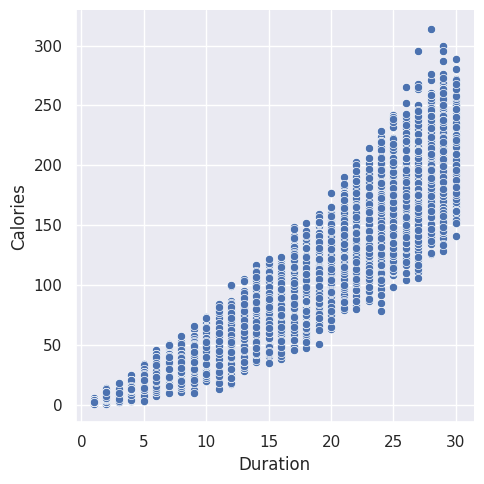

In [25]:
sns.relplot(data=df, x="Duration", y="Calories")   #Duration and Calories Burnt are highly correlated

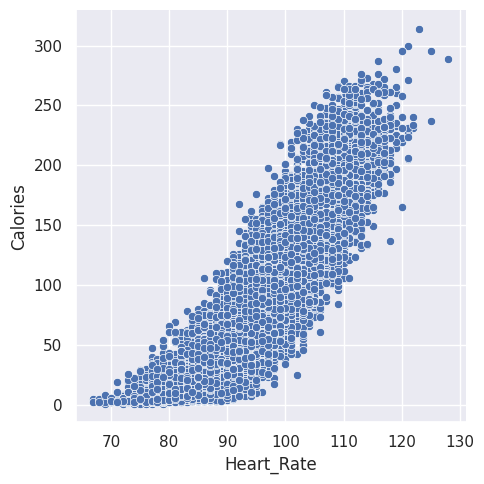

In [26]:
sns.relplot(data=df, x="Heart_Rate", y="Calories")

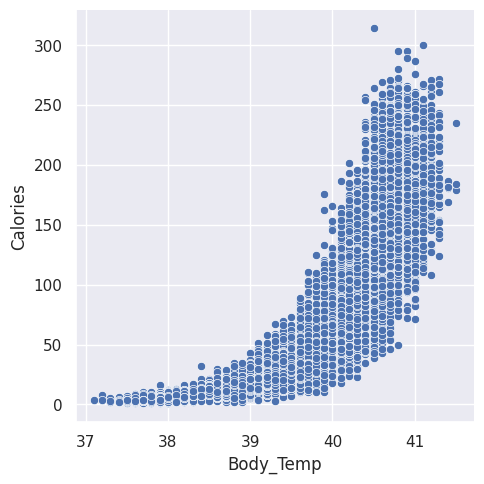

In [27]:
sns.relplot(data=df, x="Body_Temp", y="Calories")

In [28]:
#We can see that heart rate,body temperature and Duration of exercise are the most crucial factors influencing the Calories burnt

In [29]:
print(df.columns)

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')


## Checking for Multicollinearity

## What is Variance Inflation Factor?
## It's a metric or a score that tells us how well the variance captured by a particular column is explained by combination of other columns in the dataset.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
X=df[['Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp']]
y=df[['Calories']]
columns=list(X.columns)

In [32]:
print(columns)

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']


In [33]:
vif_df = pd.DataFrame()
vif_df["Column"] = columns
vif_df["VIF"] = [variance_inflation_factor(X, i) for i in range(len(columns))]
vif_df.sort_values(by="VIF", ascending=False)

,Column,VIF
1,Height,1890.015994
5,Body_Temp,1059.613217
4,Heart_Rate,361.972811
2,Weight,329.400663
3,Duration,14.036652
0,Age,7.947237


Height	    Extremely high multicollinearity. Suggests that "Height" is almost perfectly correlated              with one or more other variables.
Body_Temp	Extremely high multicollinearity. Needs immediate attention.
Heart_Rate	Very high multicollinearity. Likely redundant.
Weight	    Very high multicollinearity. Needs to be addressed.
Duration	Moderate multicollinearity. This might not be a major issue, but it’s worth monitoring.
Age	    	Moderate multicollinearity. Relatively lower compared to other features but may still                require examination.

## Since our features are highly correlated with each other,we will go with recurisve feature elimination to select the best features

In [34]:
#Encoding our categorical data
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [35]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Initialize the encoder
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity

# Fit and transform the 'Gender' column
encoded_array = encoder.fit_transform(df[['Gender']])

# Convert to a DataFrame and add to the original data
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Gender']))
data_encoded = pd.concat([df, encoded_df], axis=1)

data_encoded.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,0.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,0.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,0.0


In [36]:
#Dropping irrelevant columns
data_encoded.drop(['User_ID','Gender'],axis=1,inplace=True)

In [37]:
data_encoded.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,231.0,1.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0,0.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0,1.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0,0.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0,0.0


In [38]:
data_encoded.columns

Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories', 'Gender_male'],
      dtype='object')

# **Modelling**

# 1. We will start with Linear Regression and gradually move to complex algorithms to see if the performance is improving .
# 2. We will also use RFE to select a subset of optimal features for our predictions.

In [39]:
X=data_encoded[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Gender_male']]
y=data_encoded['Calories']

## Data Scaling

In [40]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Train Test Split

In [43]:
#importing libraries for splitting data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)

(12000, 7)
(3000, 7)


## Linear Regression

In [47]:
linear=LinearRegression()
linear.fit(X_train,y_train)


LinearRegression()

In [50]:
# predict the train and test dataset 
y_pred_train = linear.predict(X_train)
y_pred = linear.predict(X_test)

# LinearRegression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9671621074066676
Adjusted R2 score 0.9671429391905108


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9672937151257295
Adjusted R2 score 0.9672171964111173


The performance metrics
-----------------------------------------
MSE 131.99574575081698
RMSE 11.48894014915288


## Lasso Regression

In [51]:
lasso=Lasso()
lasso.fit(X_train,y_train)


Lasso()

In [52]:
# predict the train and test dataset 
y_pred_train = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

# Lasso Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9611543341845726
Adjusted R2 score 0.9611316590961213


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9608762187114794
Adjusted R2 score 0.9607846858007109


The performance metrics
-----------------------------------------
MSE 157.89542308526458
RMSE 12.565644555105981


## Random Forest Regressor

In [53]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [54]:
# predict the train and test dataset 
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

# Random Forest model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9996894027773852
Adjusted R2 score 0.9996892214748035


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9982182664192673
Adjusted R2 score 0.9982140979249273


The performance metrics
-----------------------------------------
MSE 7.190705199999999
RMSE 2.6815490299451916


In [66]:
print(f"Score: {rf.score(X_test, y_test)}")

Score: 0.9982182664192673


In [86]:
X=pd.DataFrame(X)

## Feature Importance

In [88]:
#Checking feature importance
feature_importance_df=pd.DataFrame({'Feature':X.columns,'Importance':rf.feature_importances_}).sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
3,3,0.914537
4,4,0.047650
0,0,0.026339
6,6,0.006689
2,2,0.003062
1,1,0.001243
5,5,0.000480


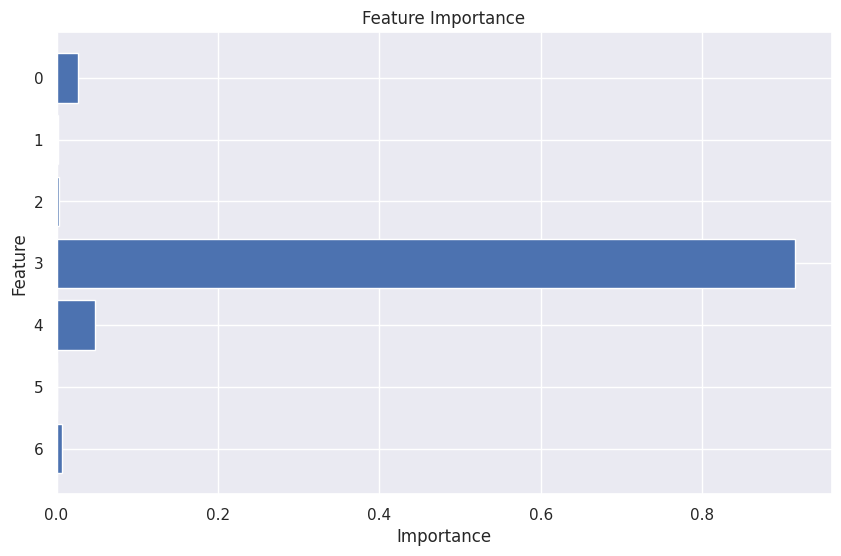

In [89]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

## RFE Random Forest

In [69]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestRegressor(random_state = 24), n_features_to_select=5)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(random_state=24), n_features_to_select=5)

In [70]:
rfe.support_

array([ True, False,  True,  True,  True, False,  True])

## Using Selected columns to train the Model again

In [71]:
selected_train = rfe.transform(X_train)
selected_test = rfe.transform(X_test)

In [72]:
selected_train.shape, selected_test.shape

((12000, 5), (3000, 5))

In [73]:
rf_model_rfe = RandomForestRegressor(random_state = 24)
rf_model_rfe.fit(selected_train, y_train)

RandomForestRegressor(random_state=24)

In [74]:
# predict the train and test dataset 
y_pred_train = rf_model_rfe.predict(selected_train)
y_pred = rf_model_rfe.predict(selected_test)

# Random Forest model with recursive feature elimination all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((selected_train.shape[0]-1)/(selected_train.shape[0]-selected_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((selected_test.shape[0]-1)/(selected_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9997400355907393
Adjusted R2 score 0.9997399272180492


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9984888727442307
Adjusted R2 score 0.9984853373529238


The performance metrics
-----------------------------------------
MSE 6.098594500000001
RMSE 2.469533255495864


In [75]:
print(f"Score: {rf_model_rfe.score(selected_test, y_test)}")

Score: 0.9984888727442307


## The Important Columns 

In [92]:
# Get the selected column names
selected_columns = X.columns[rfe.support_]
print("Selected Features:", selected_columns.tolist())

Selected Features: [0, 2, 3, 4, 6]


## Decision Tree Regressor

In [64]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [76]:
# predict the train and test dataset 
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

# Decision Tree model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9996894027773852
Adjusted R2 score 0.9996892214748035


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9982182664192673
Adjusted R2 score 0.9982140979249273


The performance metrics
-----------------------------------------
MSE 7.190705199999999
RMSE 2.6815490299451916


## Feature Importance

In [107]:
#Checking feature importance
feature_importance_df=pd.DataFrame({'Feature':X.columns,'Importance':dt.feature_importances_}).sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
3,3,0.913775
4,4,0.049048
0,0,0.025605
6,6,0.007533
2,2,0.002544
1,1,0.001106
5,5,0.000389


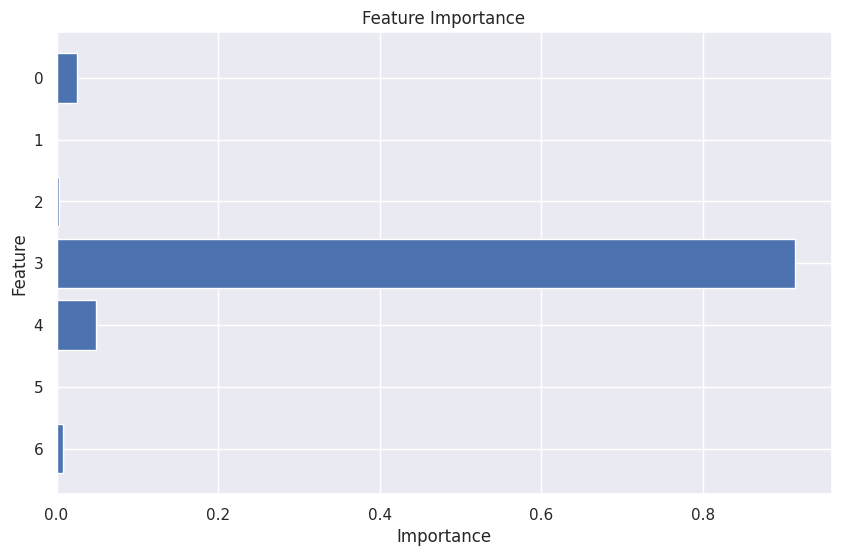

In [108]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

## XGB Regressor

In [93]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [94]:
# predict the train and test dataset 
y_pred_train = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

# XGB model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9995777219604748
Adjusted R2 score 0.9995774754672896


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9988680981634738
Adjusted R2 score 0.9988654499974123


The performance metrics
-----------------------------------------
MSE 4.568119785030486
RMSE 2.1373160236685838


## RFE XGB

In [96]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=XGBRegressor(random_state = 24), n_features_to_select=5)
rfe.fit(X_train, y_train)

RFE(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, device=None,
                           early_stopping_rounds=None, enable_categorical=False,
                           eval_metric=None, feature_types=None, gamma=None,
                           grow_policy=None, importance_type=None,
                           interaction_constraints=None, learning_rate=None,
                           max_bin=None, max_cat_threshold=None,
                           max_cat_to_onehot=None, max_delta_step=None,
                           max_depth=None, max_leaves=None,
                           min_child_weight=None, missing=nan,
                           monotone_constraints=None, multi_strategy=None,
                           n_estimators=None, n_jobs=None,
                           num_parallel_tree=None, random_state=24, ...),
    n_features_to_select=5)

In [97]:
selected_train = rfe.transform(X_train)
selected_test = rfe.transform(X_test)

In [98]:
xgb_model_rfe = XGBRegressor(random_state = 24)
xgb_model_rfe.fit(selected_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=24, ...)

In [99]:
# predict the train and test dataset 
y_pred_train = xgb_model_rfe.predict(selected_train)
y_pred = xgb_model_rfe.predict(selected_test)

# XGB model with recursive feature elimination all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((selected_train.shape[0]-1)/(selected_train.shape[0]-selected_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((selected_test.shape[0]-1)/(selected_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9995739204259017
Adjusted R2 score 0.9995737428039347


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9989983915763565
Adjusted R2 score 0.9989960482411407


The performance metrics
-----------------------------------------
MSE 4.042282739765908
RMSE 2.0105428967733836


## CATBOOST Regressor

In [101]:
catb=CatBoostRegressor()
catb.fit(X_train,y_train)

Learning rate set to 0.06063
0:	learn: 58.7160134	total: 56.9ms	remaining: 56.8s
1:	learn: 55.5512682	total: 59.5ms	remaining: 29.7s
2:	learn: 52.4990118	total: 62.1ms	remaining: 20.6s
3:	learn: 49.6636889	total: 65.3ms	remaining: 16.3s
4:	learn: 47.0242496	total: 68.3ms	remaining: 13.6s
5:	learn: 44.4686805	total: 71ms	remaining: 11.8s
6:	learn: 42.0643212	total: 73.7ms	remaining: 10.4s
7:	learn: 39.9446197	total: 76.7ms	remaining: 9.51s
8:	learn: 37.8569921	total: 79.7ms	remaining: 8.78s
9:	learn: 35.9135831	total: 82.3ms	remaining: 8.15s
10:	learn: 34.0833212	total: 85ms	remaining: 7.64s
11:	learn: 32.3347110	total: 87.8ms	remaining: 7.23s
12:	learn: 30.6783354	total: 90.5ms	remaining: 6.87s
13:	learn: 29.1079668	total: 93.4ms	remaining: 6.58s
14:	learn: 27.6000000	total: 96.6ms	remaining: 6.34s
15:	learn: 26.2237454	total: 99.1ms	remaining: 6.09s
16:	learn: 24.8886477	total: 102ms	remaining: 5.89s
17:	learn: 23.6798067	total: 105ms	remaining: 5.72s
18:	learn: 22.5333171	total: 108m

In [103]:
# predict the train and test dataset 
y_pred_train = catb.predict(X_train)
y_pred = catb.predict(X_test)

# CatBoost model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9999313616425319
Adjusted R2 score 0.9999313215767796


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9998854278232082
Adjusted R2 score 0.9998851597733294


The performance metrics
-----------------------------------------
MSE 0.462389414635963
RMSE 0.6799922165995453
